# <center><font color = "red">Heart Attack Prediction</font></center>

### Importing Required Modules

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

### Importing Data

In [37]:
df=pd.read_csv('Data/heart_disease.csv')

In [38]:
df.head(50)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


### Statistical inferences

In [39]:
df[:].describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Analysing Missing Values

In [40]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

education: 0.0248% missing values
cigsPerDay: 0.0068% missing values
BPMeds: 0.0125% missing values
totChol: 0.0118% missing values
BMI: 0.0045% missing values
glucose: 0.0916% missing values


### The advantage of below table shown is that the 'currentSmoker' column has value of 1 for all 'cigsPerDay' null values. 
### This helps in conveying that all missing values of cigsPerDay would not be zero.


In [41]:
series = pd.isnull(df['cigsPerDay'])
df[series]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0
1347,0,58,4.0,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0
1451,1,54,1.0,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1497,1,55,1.0,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.0,0
1610,0,61,1.0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
1625,0,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0
1870,0,47,2.0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0


### As Education does not play a factor in Heart Attack, I have dropped that column


In [42]:
data = df.drop(['education','currentSmoker','prevalentHyp'], axis = 1)
data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Filling NAN values with their respective column mean values

In [43]:
mean_cigsPerDay = round(data["cigsPerDay"].mean())
mean_BPmeds = round(data["BPMeds"].mean())
mean_totChol = round(data["totChol"].mean())
mean_BMI = round(data["BMI"].mean())
mean_glucose = round(data["glucose"].mean())
mean_heartRate = round(data["heartRate"].mean())

In [44]:
data['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
data['BPMeds'].fillna(mean_BPmeds, inplace = True)
data['totChol'].fillna(mean_totChol, inplace = True)
data['BMI'].fillna(mean_BMI, inplace = True)
data['glucose'].fillna(mean_glucose, inplace = True)
data['heartRate'].fillna(mean_heartRate, inplace = True)


In [45]:
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1]
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

In [46]:
data[:].isnull().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Hurray !! we made it.. All NAN values are fixed
<img src = "https://qph.fs.quoracdn.net/main-qimg-52aaf39089c8b28eb87fcd8e59d5d24e">

In [47]:
data.groupby('TenYearCHD').mean()

,male,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,
0,0.410684,48.767668,8.712577,0.023094,0.003895,0.019199,235.193378,130.333612,82.160963,25.673826,75.762382,80.806066
1,0.532609,54.145963,10.624224,0.063665,0.017081,0.062112,245.271739,143.618789,86.981366,26.523199,76.529503,88.464286


### Some Key Takeaways
1. Most of the Male has 10-year risk of developing coronary heart disease.
2. Most of the people having mean of age group 54.25 have high risk for developing coronary heart disease
3. Current Smoker have high high risk for developing coronary heart disease than non smokers
4. CigsPerDay, BPMeds, prevalentStroke, prevalentHyp are directly proportional with developing the risk for CHR

### Pictorial Analysis

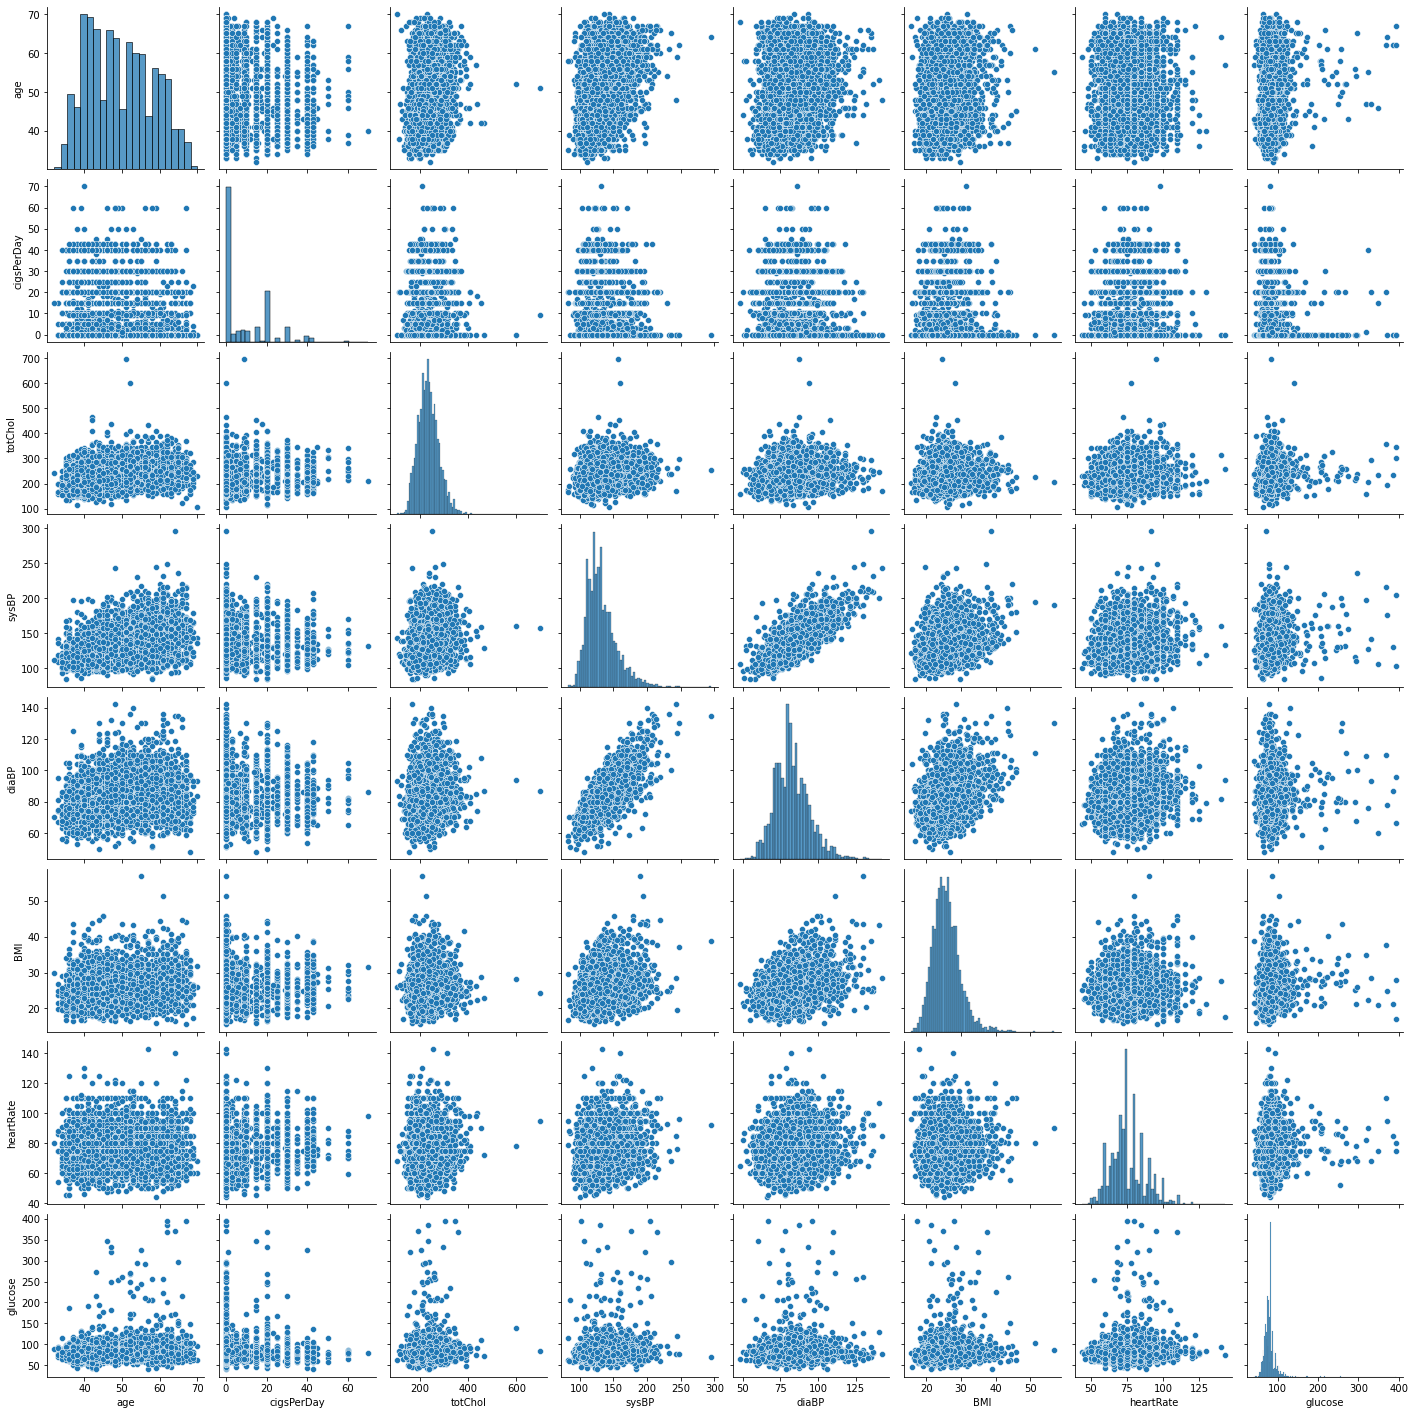

In [48]:
sns.pairplot(data[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]])

### Normalization

In [49]:
cols_to_be_normalized = ["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]
cols_not_to_be_normalized = ["male","BPMeds","prevalentStroke","diabetes","TenYearCHD"]

normalized = normalize(data[cols_to_be_normalized])
boolean = data[cols_not_to_be_normalized]

In [50]:
df_normalized = pd.DataFrame(normalized,columns = cols_to_be_normalized)
df_boolean = pd.DataFrame(boolean,columns=cols_not_to_be_normalized)
# df_final = pd.concat([df_normalized,df_boolean],axis = 1)
# df_final = df_normalized.join(df_boolean)
df_final = df_normalized.merge(df_boolean,left_index=True, right_index=True)

### Segregation of Dependent & Independent Variables

In [51]:
X = df_final.drop("TenYearCHD",axis = 1)
Y = df_final["TenYearCHD"] 
X = np.array(X)
Y = np.array(Y)

### Train Test Split

In [52]:
 X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 1,test_size = 0.2)

### Initializing Logistic Regression Model

In [53]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Prediction with trained model

In [54]:
y_pred = classifier.predict(X_test)

### Evaluating trained models

In [55]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 
print (classification_report(y_test, y_pred)) 

Accuracy :  0.8620283018867925
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       733
           1       0.38      0.03      0.05       115

    accuracy                           0.86       848
   macro avg       0.62      0.51      0.49       848
weighted avg       0.80      0.86      0.81       848



## Thank you
Hope you find this notebook useful. Do support guys 

In [56]:
df_final

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,BPMeds,prevalentStroke,diabetes,TenYearCHD
0,0.148753,0.000000,0.743764,0.404302,0.266992,0.102868,0.305134,0.293691,1,0.0,0,0,0
1,0.144425,0.000000,0.784921,0.379902,0.254314,0.090203,0.298270,0.238616,0,0.0,0,0,0
2,0.154476,0.064365,0.788469,0.410326,0.257459,0.081550,0.241368,0.225277,1,0.0,0,0,0
3,0.190605,0.093740,0.703050,0.468700,0.296843,0.089303,0.203103,0.321841,0,0.0,0,0,1
4,0.131263,0.065631,0.813259,0.370960,0.239697,0.065917,0.242551,0.242551,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.127660,0.002553,0.799152,0.457023,0.234895,0.066307,0.168511,0.219575,1,0.0,0,0,1
4234,0.181520,0.153046,0.736759,0.450241,0.284738,0.070152,0.231349,0.242027,1,0.0,0,0,0
4235,0.150672,0.062780,0.778471,0.411208,0.226008,0.069058,0.263676,0.269954,0,0.0,0,0,0
4236,0.151527,0.051657,0.723195,0.435639,0.299610,0.065983,0.296166,0.282391,0,0.0,0,0,0


In [60]:
pickle.dump(classifier,open('model.pkl','wb'))